In [13]:
import numpy as np
import matplotlib.pyplot as plt

In [14]:
TrainDigits = np.load('HandwrittenDigits/TrainDigits.npy')
Train_labels = np.load('HandwrittenDigits/TrainLabels.npy')

TestDigits = np.load('HandwrittenDigits/TestDigits.npy')
Test_labels = np.load('HandwrittenDigits/TestLabels.npy')
                         

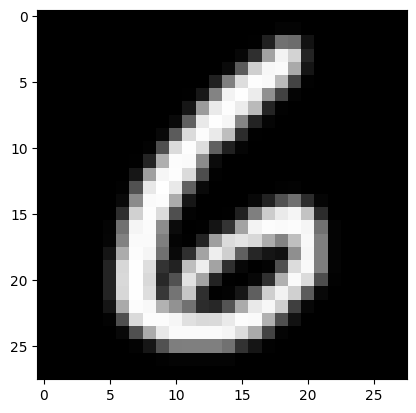

In [15]:
###Plotting

d = TrainDigits[:,47999] # The first digit in the training set
D = np.reshape(d, (28, 28)).T # Reshaping a vector to a matrix
plt.imshow(D, cmap = 'gray') # Plot of the digit

In [16]:
index_3 = np.where(Train_labels[0] == 3)[0]

index_8 = np.where(Train_labels[0] == 8)[0]

Ad_3 = TrainDigits[:,index_3[:400]]

Ad_8 = TrainDigits[:,index_8[:400]]

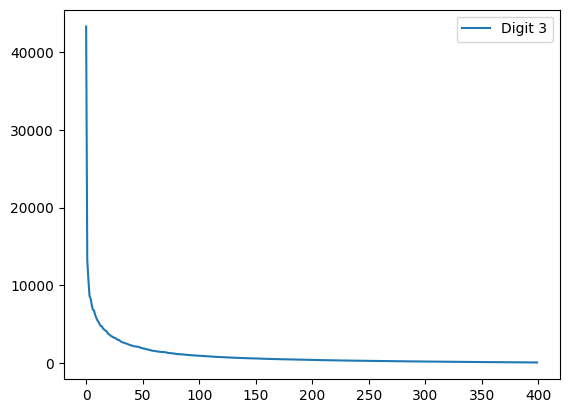

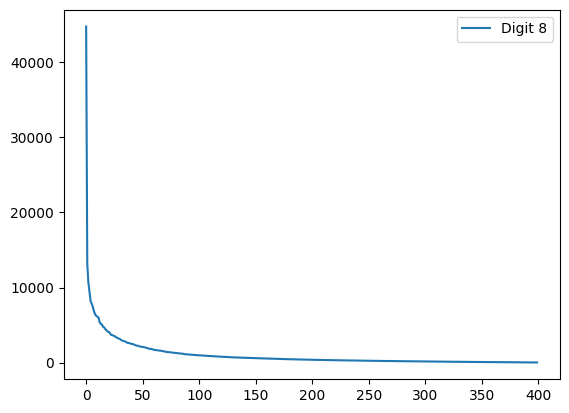

In [17]:
U_3,S_3,Vt_3 = np.linalg.svd(Ad_3)

plt.plot(S_3,label='Digit 3')
plt.legend()
plt.show()

U_8,S_8,Vt_8 = np.linalg.svd(Ad_8)

plt.plot(S_8,label='Digit 8')
plt.legend()
plt.show()

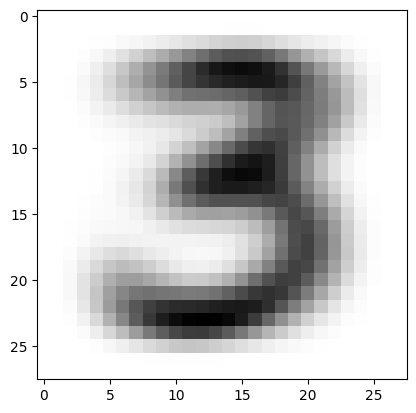

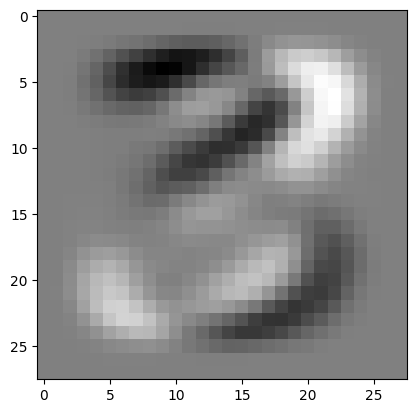

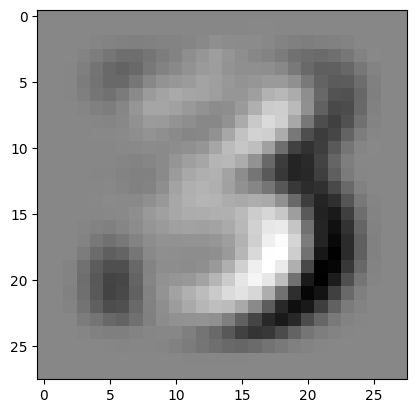

In [18]:
###Plotting

d = U_3[:,0] # The first digit in the training set
D = np.reshape(d, (28, 28)).T # Reshaping a vector to a matrix
plt.imshow(D, cmap = 'gray') # Plot of the digit
plt.show()

d = U_3[:,1] # The first digit in the training set
D = np.reshape(d, (28, 28)).T # Reshaping a vector to a matrix
plt.imshow(D, cmap = 'gray') # Plot of the digit
plt.show()

d = U_3[:,2] # The first digit in the training set
D = np.reshape(d, (28, 28)).T # Reshaping a vector to a matrix
plt.imshow(D, cmap = 'gray') # Plot of the digit
plt.show()

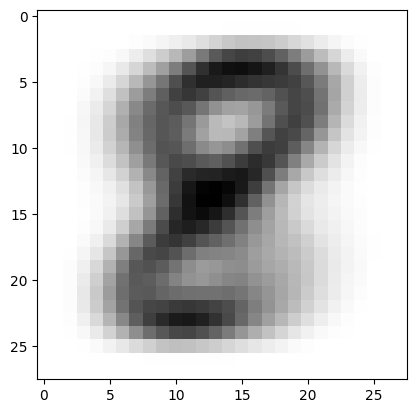

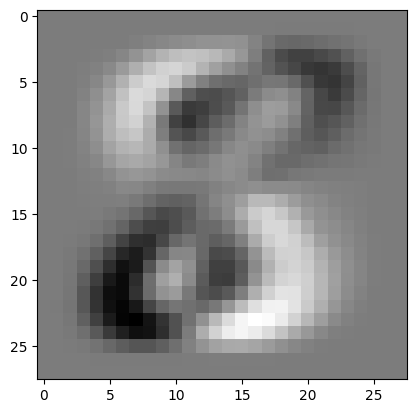

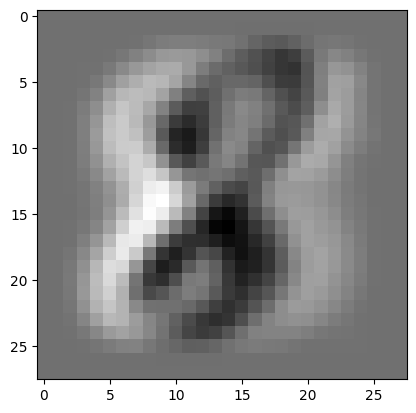

In [19]:
###Plotting

d = U_8[:,0] # The first digit in the training set
D = np.reshape(d, (28, 28)).T # Reshaping a vector to a matrix
plt.imshow(D, cmap = 'gray') # Plot of the digit
plt.show()

d = U_8[:,1] # The first digit in the training set
D = np.reshape(d, (28, 28)).T # Reshaping a vector to a matrix
plt.imshow(D, cmap = 'gray') # Plot of the digit
plt.show()

d = U_8[:,2] # The first digit in the training set
D = np.reshape(d, (28, 28)).T # Reshaping a vector to a matrix
plt.imshow(D, cmap = 'gray') # Plot of the digit
plt.show()

In [20]:
A_ds = {}
Us = {}
digit = [0,1,2,3,4,5,6,7,8,9]
for i in digit:
    index = np.where(Train_labels[0] == i)[0]

    Ad_index = TrainDigits[:,index[:400]]

    A_ds[i] = Ad_index

    U,S,Vt = np.linalg.svd(Ad_index)

    Us[i] = U

In [ ]:
def residual_calc(k):
    residuals = np.arange(40000)

    for U,digit in zip(Us.values(),Us.keys()):
        U_k = U[:,:k]
        #print(U_k[0])
        #S_k = S[:k]
        #Vt_k = Vt[:k,:]
        #S_k = np.diag(S_k)

        res_component = np.identity(len(U_k[:,0])) - U_k @ np.transpose(U_k)

        residual_digit = np.linalg.norm(res_component @ TestDigits,2,axis = 0)
        residuals = np.vstack([residuals, residual_digit])

    return residuals[1:,:]

In [31]:
identification_k_dep = []
for k in range(1,16):
    residuals = residual_calc(k)
    identified_digit = np.argmin(residuals,axis=0)
    correct_identfication = np.sum(identified_digit == Test_labels[0])
    identification_k_dep.append(correct_identfication/len(Test_labels[0]))

In [34]:
residuals = residual_calc(1)
identified_digit = np.argmin(residuals,axis=0)
print(identified_digit)
correct_identfication = np.sum(identified_digit == Test_labels[0])
identification_k_dep.append(correct_identfication/len(Test_labels[0]))

[0 1 9 ... 3 3 6]


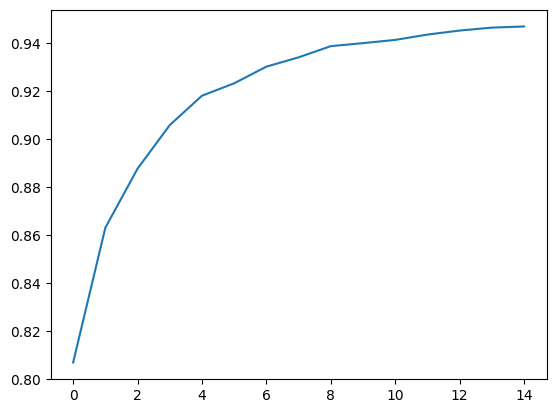

In [32]:
plt.plot(identification_k_dep)

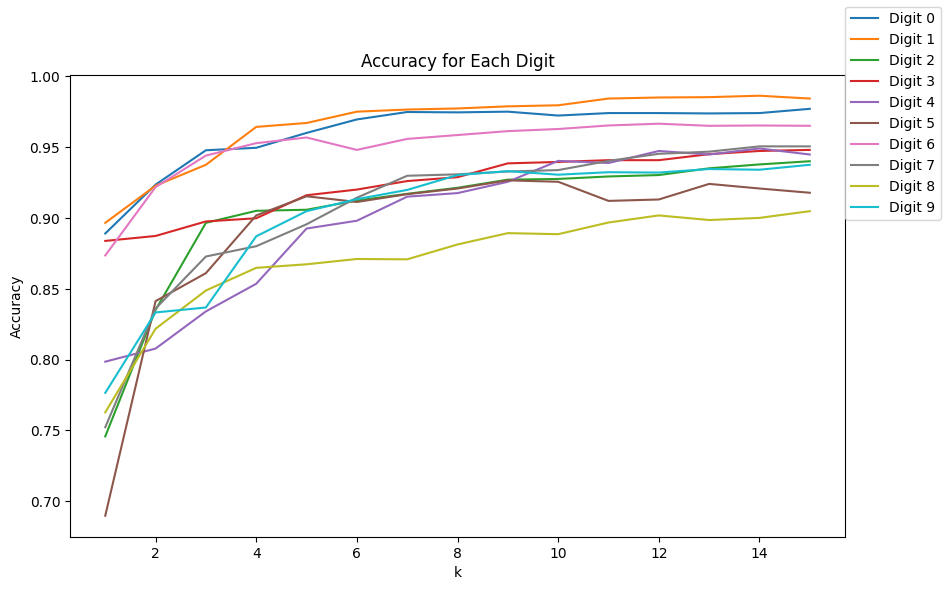

In [39]:
# Initialize a list to store the accuracy for each digit
accuracy_per_digit = [[] for _ in range(10)]

# Calculate residuals and accuracy for each digit
for k in range(1, 16):  # Assuming k ranges from 1 to 10
    residuals = residual_calc(k)
    identified_digit = np.argmin(residuals, axis=0)
    
    for digit in range(10):
        correct_identification = np.sum((identified_digit == Test_labels[0]) & (Test_labels[0] == digit))
        total_digit = np.sum(Test_labels[0] == digit)
        accuracy_per_digit[digit].append(correct_identification / total_digit if total_digit > 0 else 0)

# Plot the accuracy for each digit
fig, ax = plt.subplots(figsize=(10, 6))
for digit in range(10):
    ax.plot(range(1, 16), accuracy_per_digit[digit], label=f'Digit {digit}')

ax.set_xlabel('k')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy for Each Digit')
fig.legend()